# Scraping Overwatch Data

The purpose of this notebook is to demonstrate the use of BeautifulSoup to scrape data from the web. Here we are scraping the accuracy leaderboards of masteroverwatch.com to find the top 50 most accurate Overwatch players in the world.

In [1]:
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import re
import string as strang
import warnings
warnings.filterwarnings('ignore')

#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

url = 'https://masteroverwatch.com/leaderboards/pc/global/category/accuracy'
request = get(url)

soup = BeautifulSoup(request.text, 'html5lib')

In [2]:
table = soup.find_all('div', {'class':'table-row-content'})


In [3]:
heroes = ['doomfist','genji', 'mccree', 'pharah', 'reaper', 'soldier-76', 'sombra',
         'tracer', 'bastion', 'hanzo', 'junkrat','mei','torbjorn', 'widowmaker',
         'dva', 'orisa', 'reinhardt', 'roadhog', 'winston', 'zarya', 'ana', 
          'brigitte','lucio', 'mercy', 'moira', 'symmetra', 'zenyatta']

In [4]:
rank = []
battletag = []
rating = []
accuracy = []
wins = []
losses= []
winslosses = []
kdratio = []
killsdeaths = []
timeplayed = []
timeonfire = []
favechar = []
kills = []
deaths = []

for x in range(1, len(table)):
    row =  table[x]
    fave_heroes = str(table[x].find('span', {'class':'heroes-hero'}))
    
    
    
    rank.append(row.find('div', {'class':'table-column-left table-rank'}).text)
    battletag.append(re.sub('\n\s+','',row.find('div', {'class':'table-column-left table-name'}).strong.text))
    rating.append(re.sub(',', '',re.sub('Rating ', '', row.find('div', {'class':'table-column-left table-name'}).small.text)))
    accuracy.append(row.find('div', {'class':'table-main-value col-xs-3'}).strong.text[:-1])
    wins.append(re.sub('W','',row.find('span', {'class':'bar-wins'}).text))
    losses.append(re.sub('L','',row.find('span', {'class':'bar-losses'}).text))
    winslosses.append(row.find('div', {'class':'bar-outer'}).text[:-1])
    kdratio.append(row.find('div', {'class':"table-kd-ratio col-xs-2"}).strong.text)
    killsdeaths.append(re.sub(',' , '',row.find('div', {'class':"table-kd-ratio col-xs-2"}).small.text))
    timeplayed.append(re.sub(' hour', '',re.sub(' hours', '',row.find('div', {'class':'time-played'}).text)))
    timeonfire.append(row.find('div', {'class':'time-fire'}).text)
    favechar.append(''.join([hero for hero in heroes if hero in fave_heroes]))
    kills.append(re.search('\d+',re.sub(',' , '',row.find('div', {'class':"table-kd-ratio col-xs-2"}).small.text)).group())
    deaths.append(re.search('/\s\d+',re.sub(',' , '',row.find('div', {'class':"table-kd-ratio col-xs-2"}).small.text)).group()[2:])

In [5]:
overwatch = pd.DataFrame({'Rank':rank,
                          'BattleTag':battletag, 
                          'Rating':rating,
                         'Accuracy': accuracy,
                         'Wins':wins,
                         'Losses':losses,
                        'Win_Percent':winslosses,
                        'KD_Ratio':kdratio,
                          'Kills': kills,
                          'Deaths': deaths,
                        'HoursPlayed':timeplayed,
                        'TimeonFire':timeonfire,
                        'FaveChar':favechar
                        })

overwatch['Rating'] = overwatch['Rating'].astype('int')
overwatch['Accuracy'] = overwatch['Accuracy'].astype('float')
overwatch['Wins'] = overwatch['Wins'].astype('int')
overwatch['Losses'] = overwatch['Losses'].astype('int')
overwatch['Win_Percent'] = overwatch['Win_Percent'].astype('float')
overwatch['KD_Ratio'] = overwatch['KD_Ratio'].astype('float')
overwatch['Kills'] = overwatch['Kills'].astype('int')
overwatch['Deaths'] = overwatch['Deaths'].astype('int')
overwatch['HoursPlayed'] = overwatch['HoursPlayed'].astype('int')


overwatch

,Rank,BattleTag,Rating,Accuracy,Wins,Losses,Win_Percent,KD_Ratio,Kills,Deaths,HoursPlayed,TimeonFire,FaveChar
0,#1,Jhezz93,2167,58.3,72,63,53.3,0.58,545,947,25,1 hour,mercy
1,#2,CARD,3657,53.0,15,4,78.9,2.55,591,232,3,44 minutes,pharah
2,#2,TakeOver,4237,53.0,7,9,43.8,2.58,416,161,3,34 minutes,widowmaker
3,#4,Blue,846,52.7,45,117,27.8,2.45,2334,954,22,4 hours,lucio
4,#5,JoEy,2681,52.3,9,2,81.8,4.49,328,73,2,23 minutes,zarya
5,#5,Tauriel,2224,52.3,72,64,52.9,4.07,3092,760,26,3 hours,widowmaker
6,#7,Pharah,3783,52.0,94,97,49.2,2.17,5138,2372,39,5 hours,pharah
7,#8,ĊĿǏŊTŴǾǾD,3091,51.0,22,6,78.6,2.89,765,265,5,1 hour,hanzo
8,#8,KorraSpirit,3000,51.0,5,5,50.0,2.42,281,116,2,21 minutes,pharah
9,#10,MYLEAVE,3579,50.6,12,6,66.7,3.03,527,174,3,45 minutes,tracer


## Brief Statistics

### 1. Most accurate players are all relatively new players.

C:\Users\Harrison\Anaconda3\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


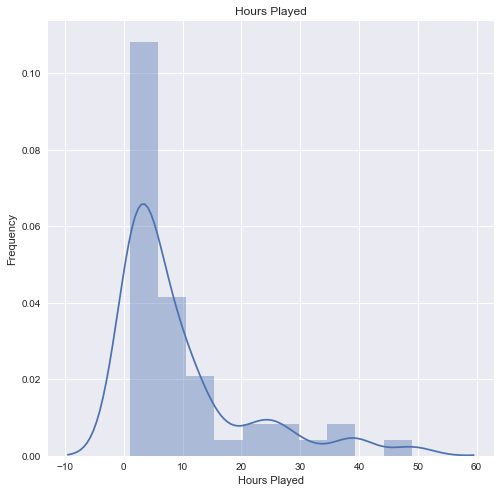

In [6]:
plt.figure(figsize = (8,8))
sns.distplot(overwatch['HoursPlayed'])
plt.title('Hours Played')
plt.ylabel('Frequency')
plt.xlabel('Hours Played')
plt.show()

### 2. Mean win rate of 57% (above normal)

C:\Users\Harrison\Anaconda3\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


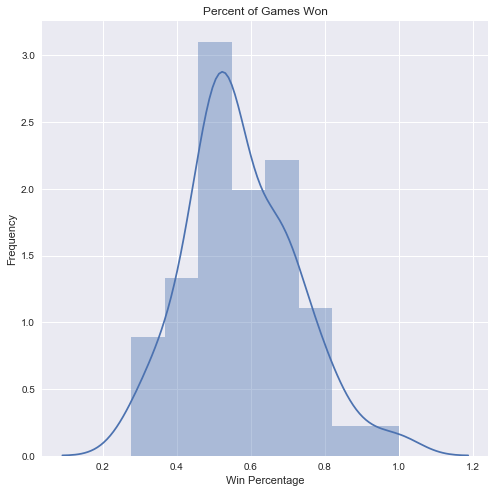

In [7]:
plt.figure(figsize=(8,8))

sns.distplot(overwatch['Win_Percent']/100)
plt.title('Percent of Games Won')
plt.ylabel('Frequency')
plt.xlabel('Win Percentage')
plt.show()

### 3. Most played character: Widowmaker (the sniper)

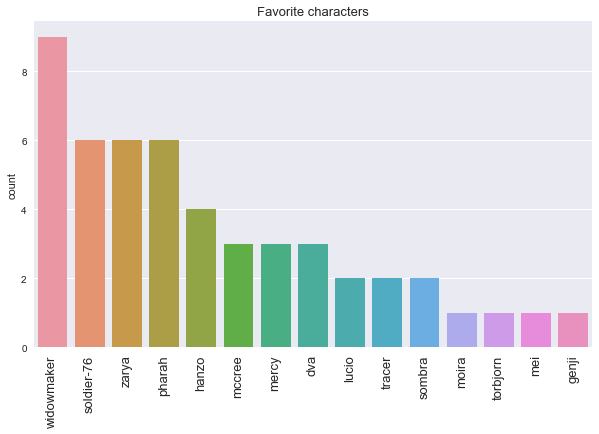

In [16]:
faves = overwatch['FaveChar'].value_counts()
plt.figure(figsize=(10,6))
sns.countplot(x = 'FaveChar',
              data = overwatch,
             order = faves.index)
plt.xticks(rotation=90, size = 13)
plt.title("Favorite characters", size = 13)
plt.xlabel('')
plt.show()

## Conclusion

In this mini-project, we demonstrated the usefulness of BeautifulSoup and its quick turnaround for web scraping. We also made some basic statistical visualizations to examine the data we received from masteroverwatch.